In [1]:
#### The other library from pyAudioAnalysis import audioSegmentation
from pydub import AudioSegment
from pydub.silence import split_on_silence
from pydub.playback import play  
from matplotlib import pyplot as plt
import numpy as np
# Play

def match_target_amplitude(aChunk, target_dBFS):
    ''' Normalize given audio chunk '''
    change_in_dBFS = target_dBFS - aChunk.dBFS
    return aChunk.apply_gain(change_in_dBFS)

# Load your audio.
song = AudioSegment.from_mp3("Bornacrime - 005.mp3")
#play(song)
print(song.dBFS,song.max_dBFS,song.channels)


-25.16022736199808 -0.8629405276946065 1


Duration of Audio in Seconds 37.04
Duration of Audio in Minutes 0.6173333333333333


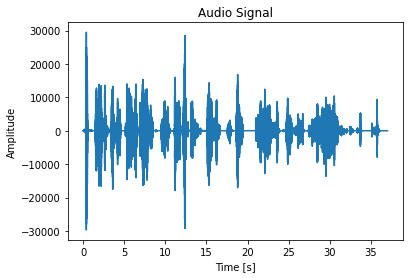

In [35]:
samples = song.get_array_of_samples()
# Split track where the silence is 2 seconds or more and get chunks using 
# the imported function.


# Duration of the audio in Seconds
duration = len(samples)/song.frame_rate
print("Duration of Audio in Seconds", duration)
print("Duration of Audio in Minutes", duration/60)

time = np.arange(0,duration,1/song.frame_rate)

# Plotting the Graph using Matplotlib
plt.plot(time,samples)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Audio Signal')
plt.show()

In [36]:
# Import the AudioSegment class for processing audio and the 
# split_on_silence function for separating out silent chunks.
from pydub import AudioSegment
from pydub.silence import split_on_silence
min_silence_len=2000
silence_thresh=-16
# Define a function to normalize a chunk to a target amplitude.
def match_target_amplitude(aChunk, target_dBFS):
    ''' Normalize given audio chunk '''
    change_in_dBFS = target_dBFS - aChunk.dBFS
    return aChunk.apply_gain(change_in_dBFS)


# Split track where the silence is 2 seconds or more and get chunks using 
# the imported function.
chunks = split_on_silence (
    # Use the loaded audio.
    song, 
    # Specify that a silent chunk must be at least 2 seconds or 2000 ms long.
    min_silence_len = min_silence_len,
    # Consider a chunk silent if it's quieter than -16 dBFS.
    # (You may want to adjust this parameter.)
    silence_thresh = silence_thresh
)

# Process each chunk with your parameters
for i, chunk in enumerate(chunks):
    # Create a silence chunk that's 0.5 seconds (or 500 ms) long for padding.
    silence_chunk = AudioSegment.silent(duration=500)

    # Add the padding chunk to beginning and end of the entire chunk.
    audio_chunk = silence_chunk + chunk + silence_chunk

    # Normalize the entire chunk.
    normalized_chunk = match_target_amplitude(audio_chunk, -20.0)

    # Export the audio chunk with new bitrate.
    print("Exporting chunk{0}.mp3.".format(i))
    normalized_chunk.export(
        "output2/chunk{0}.wav".format(i),
        bitrate = "192k",
        format = "wav"
    )

UnboundLocalError: local variable 'start_ii' referenced before assignment